In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
import plotly.express as px

In [ ]:
plt.style.use("ggplot")
sns.set_palette("Set2")
print(" Libraries Loaded Successfully!")

 Libraries Loaded Successfully!


In [28]:
np.random.seed(42)
sales_data = pd.DataFrame({
    'Month': pd.date_range(start='2024-01-01', periods=12, freq='ME'),
    'Sales': np.random.randint(20000, 80000, 12),
    'Profit': np.random.randint(5000, 20000, 12),
    'Customers': np.random.randint(200, 1000, 12)
})

In [29]:
web_data = pd.DataFrame({
    'Day': pd.date_range(start='2024-01-01', periods=30, freq='D'),
    'Page_Views': np.random.randint(1000, 8000, 30),
    'Bounce_Rate': np.random.uniform(30, 70, 30),
    'Conversion_Rate': np.random.uniform(1, 10, 30)
})

In [30]:
cyber_data = pd.DataFrame({
    'Session_ID': range(1, 201),
    'Packets_Sent': np.random.randint(20, 200, 200),
    'Packets_Received': np.random.randint(20, 200, 200),
    'Failed_Logins': np.random.randint(0, 5, 200),
    'Data_Usage_MB': np.random.uniform(10, 500, 200)
})
print(" Sample Datasets Created")

 Sample Datasets Created


In [31]:
print("\n DATA ANALYTICS: Exploring sales data")
print(sales_data.describe())



 DATA ANALYTICS: Exploring sales data
                     Month         Sales      Profit   Customers
count                   12     12.000000     12.0000   12.000000
mean   2024-07-15 20:00:00  49895.916667  13199.0000  575.916667
min    2024-01-31 00:00:00  20860.000000   5769.0000  221.000000
25%    2024-04-22 12:00:00  34667.250000   9591.5000  429.000000
50%    2024-07-15 12:00:00  49578.000000  14452.5000  586.000000
75%    2024-10-07 18:00:00  67134.750000  16431.2500  722.500000
max    2024-12-31 00:00:00  76422.000000  19423.0000  947.000000
std                    NaN  20107.252430   4737.9712  233.962102


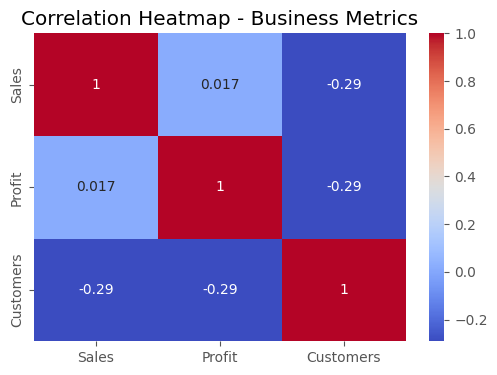

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(sales_data[['Sales', 'Profit', 'Customers']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Business Metrics")
plt.show()


 BUSINESS ANALYTICS: Sales & Profit Trends


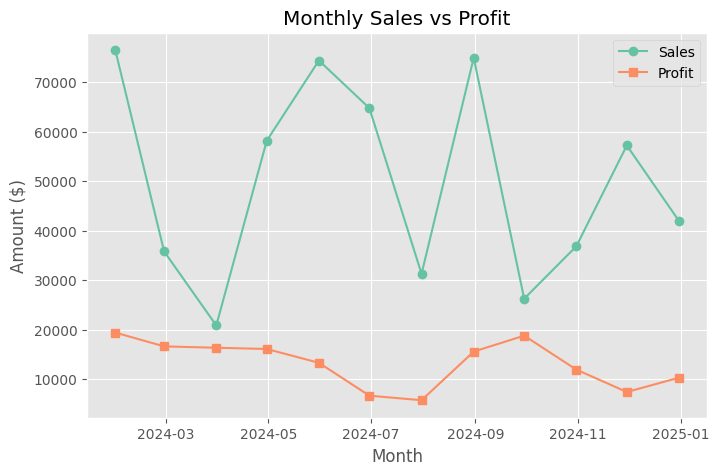

In [33]:
print("\n BUSINESS ANALYTICS: Sales & Profit Trends")

plt.figure(figsize=(8, 5))
plt.plot(sales_data['Month'], sales_data['Sales'], marker='o', label='Sales')
plt.plot(sales_data['Month'], sales_data['Profit'], marker='s', label='Profit')
plt.legend()
plt.title("Monthly Sales vs Profit")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.show()

In [34]:
best_month = sales_data.loc[sales_data['Profit'].idxmax()]
print(f" Highest Profit Month: {best_month['Month'].strftime('%B %Y')} (${best_month['Profit']})")


 Highest Profit Month: January 2024 ($19423)


In [35]:
print("\n AI/ML ANALYTICS: Customer Churn Prediction")
customer_data = pd.DataFrame({
    'Age': np.random.randint(18, 60, 300),
    'Tenure': np.random.randint(1, 10, 300),
    'Monthly_Spend': np.random.randint(500, 5000, 300),
    'Complaints': np.random.randint(0, 5, 300),
    'Churn': np.random.choice([0, 1], 300, p=[0.8, 0.2])
})


 AI/ML ANALYTICS: Customer Churn Prediction


In [37]:
X = customer_data[['Age', 'Tenure', 'Monthly_Spend', 'Complaints']]
y = customer_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, pred, zero_division=0))


Accuracy: 83.33 %

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        75
           1       0.00      0.00      0.00        15

    accuracy                           0.83        90
   macro avg       0.42      0.50      0.45        90
weighted avg       0.69      0.83      0.76        90




 WEB ANALYTICS: Website Traffic Trends


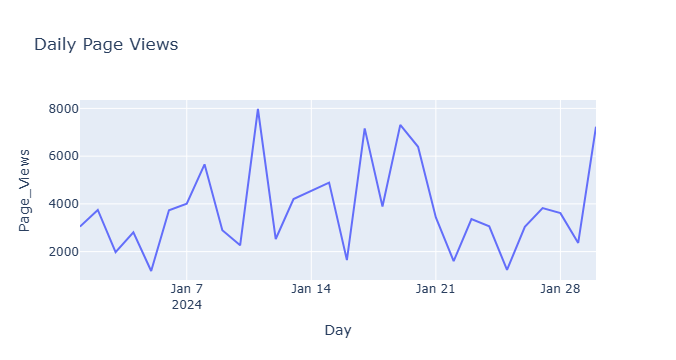

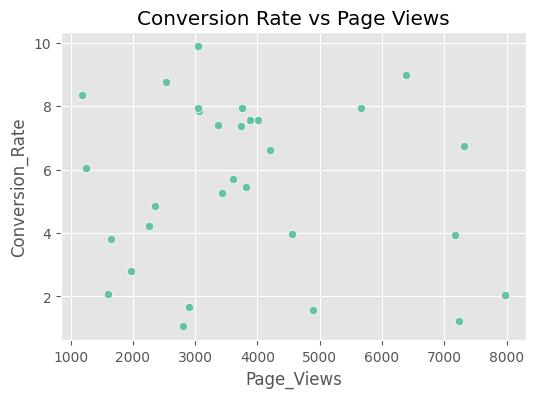

Average Bounce Rate: 48.57%


In [38]:
print("\n WEB ANALYTICS: Website Traffic Trends")

fig = px.line(web_data, x='Day', y='Page_Views', title='Daily Page Views')
fig.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Page_Views', y='Conversion_Rate', data=web_data)
plt.title("Conversion Rate vs Page Views")
plt.show()

avg_bounce = web_data['Bounce_Rate'].mean()
print(f"Average Bounce Rate: {avg_bounce:.2f}%")

In [39]:
print("\n CYBERSECURITY ANALYTICS: Anomaly Detection")

# Detect anomalies using Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
cyber_data['Anomaly'] = iso.fit_predict(cyber_data[['Packets_Sent', 'Packets_Received', 'Data_Usage_MB']])
anomalies = cyber_data[cyber_data['Anomaly'] == -1]

print(f"Detected {len(anomalies)} anomalous network sessions.")


 CYBERSECURITY ANALYTICS: Anomaly Detection
Detected 10 anomalous network sessions.


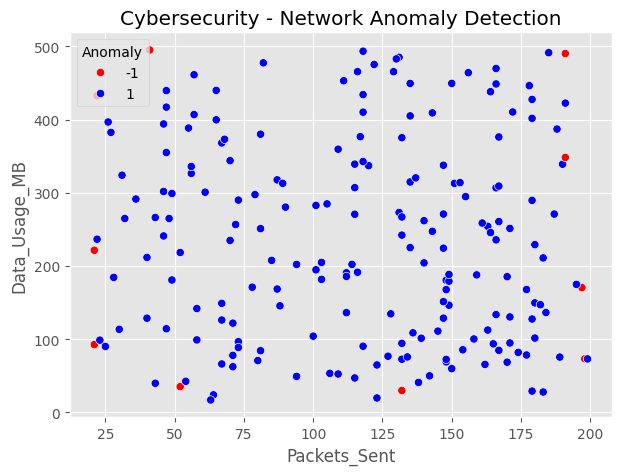

In [40]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Packets_Sent', y='Data_Usage_MB', data=cyber_data, hue='Anomaly', palette={1: 'blue', -1: 'red'})
plt.title("Cybersecurity - Network Anomaly Detection")
plt.show()


In [41]:
print("\n UNIFIED INSIGHTS SUMMARY")
print("- Average Sales: $", sales_data['Sales'].mean())
print("- Average Profit: $", sales_data['Profit'].mean())
print("- Churn Model Accuracy:", round(accuracy_score(y_test, pred) * 100, 2), "%")
print("- Average Website Bounce Rate:", round(avg_bounce, 2), "%")
print("- Detected Security Anomalies:", len(anomalies))

print("\n Unified Intelligent Analytics Platform Run Complete!")


 UNIFIED INSIGHTS SUMMARY
- Average Sales: $ 49895.916666666664
- Average Profit: $ 13199.0
- Churn Model Accuracy: 83.33 %
- Average Website Bounce Rate: 48.57 %
- Detected Security Anomalies: 10

 Unified Intelligent Analytics Platform Run Complete!
